<a href="https://colab.research.google.com/github/pastrop/kaggle/blob/master/Word_Embedings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word Embedidng with Tensorflow<br>
a bunch of approaches all based on Tensorflow

In [1]:
import numpy as np

import tensorflow as tf

!pip install -q tensorflow-hub
!pip install -q tfds-nightly
import tensorflow_hub as hub
import tensorflow_datasets as tfds

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

     |████████████████████████████████| 3.4MB 7.6MB/s 
Version:  2.3.0
Eager mode:  True
Hub version:  0.8.0
GPU is NOT AVAILABLE


In [2]:
# Split the training set into 60% and 40%, so we'll end up with 15,000 examples
# for training, 10,000 examples for validation and 25,000 examples for testing.
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompletePOH6BD/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompletePOH6BD/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompletePOH6BD/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [3]:
len(train_data)

15000

In [22]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))
np.array(train_examples_batch).tolist()

[b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
 b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development 

**Emmebdings Using CBOW**

In [23]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
embedding_large = 'https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1'
hub_layer = hub.KerasLayer(embedding_large, input_shape=[], 
                           dtype=tf.string, trainable=True)
hub_layer(train_examples_batch)

<tf.Tensor: shape=(10, 50), dtype=float32, numpy=
array([[ 5.42319477e-01, -1.19017037e-02,  6.33753762e-02,
         6.86297193e-02, -1.67768374e-01, -1.05811745e-01,
         1.68653026e-01, -4.99882400e-02, -3.11480552e-01,
         7.91034624e-02,  1.54422626e-01,  1.48866158e-02,
         3.93015295e-02,  1.97727114e-01, -1.22154757e-01,
        -4.12098095e-02, -2.70410895e-01, -2.19221517e-01,
         2.65176624e-01, -8.07390749e-01,  2.58335322e-01,
        -3.10042113e-01,  2.86832154e-01,  1.94338694e-01,
        -2.90364921e-01,  3.86284851e-02, -7.84441113e-01,
        -4.79324013e-02,  4.11029905e-01, -3.63888919e-01,
        -5.80347061e-01,  3.02694559e-01,  3.63089710e-01,
        -1.52271643e-01, -4.43915039e-01,  1.94629967e-01,
         1.95284083e-01,  5.66623397e-02,  2.89070398e-01,
        -2.84683228e-01, -5.31205582e-03,  5.71938045e-02,
        -3.20131809e-01, -4.41866480e-02, -8.55078250e-02,
        -5.58474362e-01, -2.33363912e-01, -2.07829520e-01,
      

**Universal Sentence Encoder**

In [6]:
%%capture
!pip3 install seaborn

In [7]:
#title Load the Universal Sentence Encoder's TF Hub module
from absl import logging

import matplotlib.pyplot as plt

import seaborn as sns
#param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
print ("module {} loaded".format(module_url))
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


module https://tfhub.dev/google/universal-sentence-encoder/4 loaded
module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
#title Compute a representation for each message, showing various lengths supported.
word = "Elephant"
sentence = "I am a sentence for which I would like to get its embedding."
paragraph = (
    "Universal Sentence Encoder embeddings also support short paragraphs. "
    "There is no hard limit on how long the paragraph is. Roughly, the longer "
    "the more 'diluted' the embedding will be.")
messages = [word, sentence, paragraph]

# Reduce logging output.
logging.set_verbosity(logging.ERROR)

message_embeddings = embed(messages)

for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
  print("Message: {}".format(messages[i]))
  print("Embedding size: {}".format(len(message_embedding)))
  message_embedding_snippet = ", ".join((str(x) for x in message_embedding[:5]))
  print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

Message: Elephant
Embedding size: 512
Embedding: [0.008344486355781555, 0.00048085825983434916, 0.06595248728990555, -0.01971263810992241, 0.03570082038640976, ...]

Message: I am a sentence for which I would like to get its embedding.
Embedding size: 512
Embedding: [0.050808604806661606, -0.01652429811656475, 0.01573782227933407, -0.0428641140460968, -0.04372454062104225, ...]

Message: Universal Sentence Encoder embeddings also support short paragraphs. There is no hard limit on how long the paragraph is. Roughly, the longer the more 'diluted' the embedding will be.
Embedding size: 512
Embedding: [-0.02833268791437149, -0.055862173438072205, -0.012941430322825909, -0.003221095772460103, -0.07933776825666428, ...]



In [8]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_, message_embeddings_, 90)

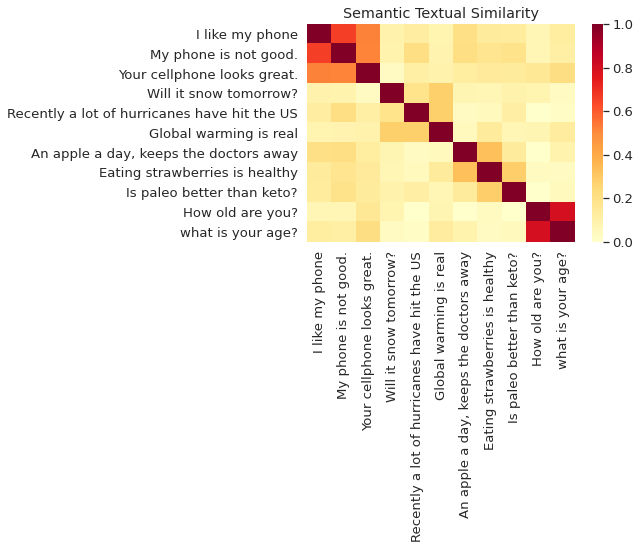

In [ ]:
messages = [
    # Smartphones
    "I like my phone",
    "My phone is not good.",
    "Your cellphone looks cool.",

    # Weather
    "Will the pandemic affect the hurricane response?",
    "Recently a lot of hurricanes have hit the US",
    "Global warming is getting worse",

    # Food and health
    "An apple a day or a bunch of blueberries?",
    "Eating strawberries is healthy",
    "Is paleo better than keto?",

    # Asking about age
    "How old are you?",
    "what is your age?",
]

run_and_plot(messages)

**Universal Sentence Encoder wth TF Datasets**

In [9]:
model_tfds = hub.KerasLayer(module_url, input_shape=[], dtype=tf.string, trainable=True)
def embed_tfds(input):
  return model_tfds(input)

In [25]:
message_imdb = embed_tfds(train_examples_batch)
imdb_review_text = []
for i, message  in enumerate(np.array(train_examples_batch).tolist()):
  imdb_review_text.append(message.decode('ascii')[:50])
  print("Message: {}".format(message))
  print("Embedding size: {}".format(len(np.array(message_imdb).tolist()[i])))
  message_embedding_snippet = ", ".join((str(x) for x in np.array(message_imdb).tolist()[i][:5]))
  print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

Message: b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
Embedding size: 512
Embedding: [0.04070188105106354, 0.004204115364700556, -0.015700584277510643, 0.0662304162979126, 0.06024029850959778, ...]

Message: b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired,

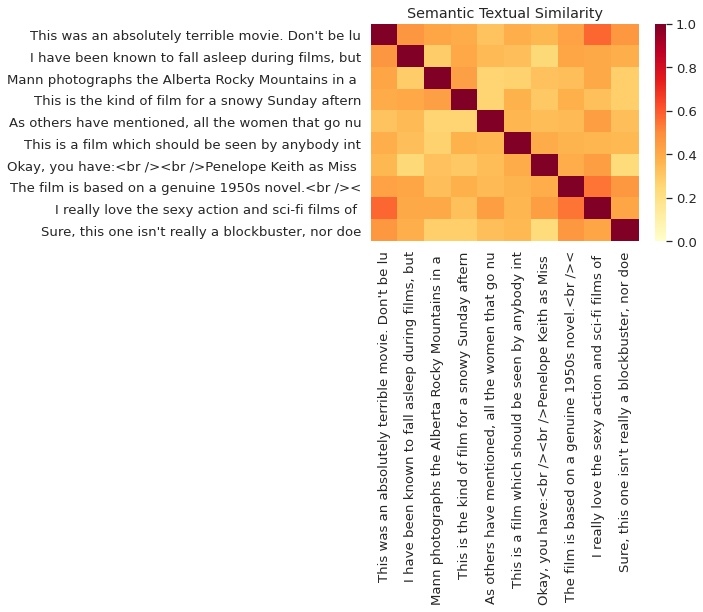

In [26]:
#imdb_review_text
#message_imdb
plot_similarity(imdb_review_text, message_imdb, 90)

**Word2Vec based Embeddings**

In [ ]:
embed = hub.load("https://tfhub.dev/google/Wiki-words-250/2")
embeddings = embed(["cat is on the mat", "dog is in the fog"])
#It can also be used within Keras:
#hub_layer = hub.KerasLayer("https://tfhub.dev/google/Wiki-words-250/2",input_shape=[], dtype=tf.string)

# PyTorch with HaggingFace

In [ ]:
!pip install pytorch_lightning

In [8]:
%%capture
!pip install transformers

In [31]:
!pip install nlp

In [11]:
from absl import app, flags, logging
#import sh

import torch as th
import pytorch_lightning as pl

import nlp
import transformers

In [17]:
#flags.DEFINE_boolean('debug', False, '')
#flags.DEFINE_integer('epochs', 10, '')
#flags.DEFINE_integer('batch_size', 8, '')
#flags.DEFINE_float('lr', 1e-2, '')
#flags.DEFINE_float('momentum', .9, '')
#flags.DEFINE_string('model', 'bert-base-uncased', '')
#flags.DEFINE_integer('seq_length', 32, '')
#flags.DEFINE_integer('percent', 5, '')

#FLAGS = flags.FLAGS

class IMDBSentimentClassifier(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.model = transformers.BertForSequenceClassification.from_pretrained('bert-base-uncased')
        self.loss = th.nn.CrossEntropyLoss(reduction='none')

    def prepare_data(self):
        tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')

        def _tokenize(x):
            x['input_ids'] = tokenizer.batch_encode_plus(
                    x['text'], 
                    max_length=128, 
                    pad_to_max_length=True)['input_ids']
            return x

        def _prepare_ds(split):
            ds = nlp.load_dataset('imdb', split=['train[:100]', 'test[:10]'])
            print('type of ds oject-{}'.format(type(ds)))
            ds = ds.map(_tokenize, batched=True)
            ds.set_format(type='torch', columns=['input_ids', 'label'])
            return ds

        self.train_ds, self.test_ds = map(_prepare_ds, ('train', 'test'))

    def forward(self, input_ids):
        mask = (input_ids != 0).float()
        logits, = self.model(input_ids, mask)
        return logits

    def training_step(self, batch, batch_idx):
        logits = self.forward(batch['input_ids'])
        loss = self.loss(logits, batch['label']).mean()
        return {'loss': loss, 'log': {'train_loss': loss}}

    def validation_step(self, batch, batch_idx):
        logits = self.forward(batch['input_ids'])
        loss = self.loss(logits, batch['label'])
        acc = (logits.argmax(-1) == batch['label']).float()
        return {'loss': loss, 'acc': acc}

    def validation_epoch_end(self, outputs):
        loss = th.cat([o['loss'] for o in outputs], 0).mean()
        acc = th.cat([o['acc'] for o in outputs], 0).mean()
        out = {'val_loss': loss, 'val_acc': acc}
        return {**out, 'log': out}

    def train_dataloader(self):
        return th.utils.data.DataLoader(
                self.train_ds,
                batch_size=32,
                drop_last=True,
                shuffle=True,
                )

    def val_dataloader(self):
        return th.utils.data.DataLoader(
                self.test_ds,
                batch_size=32,
                drop_last=False,
                shuffle=True,
                )

    def configure_optimizers(self):
        return th.optim.SGD(
            self.parameters(),
            lr=1e-2,
            momentum='momentum',
        )

In [36]:
def _tokenize(x):
    tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
    x['input_ids'] = tokenizer.batch_encode_plus(
            x['text'], 
            max_length=128, 
            pad_to_max_length=True)['input_ids']
    return x

ds = nlp.load_dataset('imdb', split='train[:5]')
print('type of ds oject-{}'.format(type(ds)))
ds.map(_tokenize)

#ds.set_format(type='torch', columns=['input_ids', 'label'])

type of ds oject-<class 'nlp.arrow_dataset.Dataset'>


Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Dataset(features: {'input_ids': Sequence(feature=Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None), length=-1, id=None), 'label': ClassLabel(num_classes=2, names=['neg', 'pos'], names_file=None, id=None), 'text': Value(dtype='string', id=None)}, num_rows: 5)

In [18]:
def model_fit():
    model = IMDBSentimentClassifier()
    trainer = pl.Trainer(
        #default_root_dir='logs',
        gpus=(1 if th.cuda.is_available() else 0),
        max_epochs=3,
        fast_dev_run=False,
        #logger=pl.loggers.TensorBoardLogger('logs/', name='imdb', version=0),
    )
    trainer.fit(model)

model_fit()
#if __name__ == '__main__':
#    app.run(main)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

type of ds oject-<class 'list'>


AttributeError: ignored

# Useful Code Snippets

In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
text_batch = ["I love Pixar.", "I don't care for Pixar."]
encoding = tokenizer(text_batch, return_tensors='pt', padding=True, truncation=True)
input_ids = encoding['input_ids']
attention_mask = encoding['attention_mask']